In [1]:
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# !unzip jena_climate_2009_2016.csv.zip

--2023-06-05 12:57:58--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.169.152, 52.216.58.80, 54.231.194.144, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.169.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12,94M  1,51MB/s    in 11s     

2023-06-05 12:58:10 (1,21 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [1]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
    data = f.read()
lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [2]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

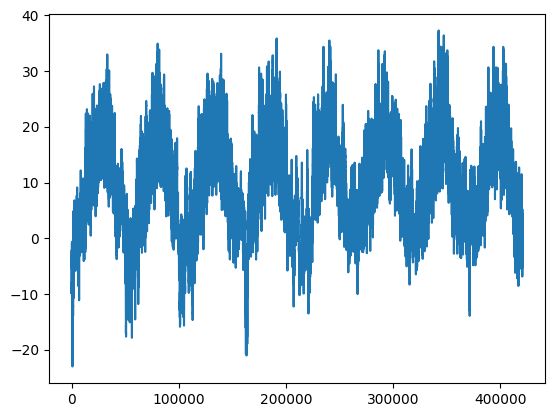

In [5]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

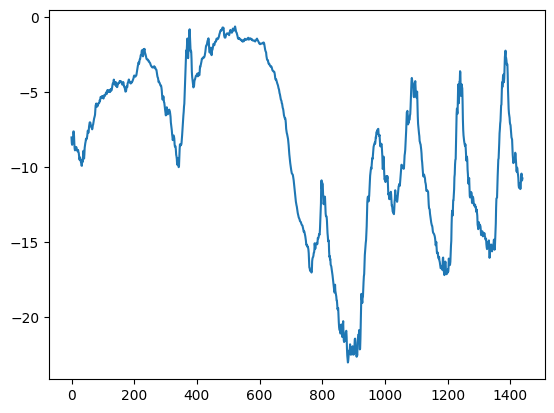

In [6]:
plt.plot(range(1440), temperature[:1440])

In [7]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [8]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [9]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)
for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

2023-06-05 13:34:52.103723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 13:34:52.650183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-05 13:34:53.135792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-05 13:34:53.152129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [10]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)
val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)
test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [11]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


2023-06-05 13:36:54.855040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [209506]
	 [[{{node Placeholder/_8}}]]
2023-06-05 13:36:54.859540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [209506]
	 [[{{node Placeholder/_28}}]]


# Computing the common-sense baseline MAE

In [12]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

2023-06-05 13:38:34.447549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [104393]
	 [[{{node Placeholder/_8}}]]
2023-06-05 13:38:34.448008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [105112]
	 [[{{node Placeholder/_20}}]]


Validation MAE: 2.44


2023-06-05 13:38:36.638331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [104256]
	 [[{{node Placeholder/_20}}]]
2023-06-05 13:38:36.638797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [104256]
	 [[{{node Placeholder/_20}}]]


Test MAE: 2.62


# Training and evaluating a densely connected model

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


2023-06-05 13:41:50.130361: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f2eec15a7d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-05 13:41:50.130383: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA TITAN V, Compute Capability 7.0
2023-06-05 13:41:50.198159: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-05 13:41:50.610921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-05 13:41:50.901236: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-05 13:41:51.176269: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


819/819 [==============================] - 8s 8ms/step - loss: 12.6472 - mae: 2.7659 - val_loss: 11.4603 - val_mae: 2.6629
Epoch 2/10
819/819 [==============================] - 7s 8ms/step - loss: 9.3679 - mae: 2.4134 - val_loss: 12.9383 - val_mae: 2.8470
Epoch 3/10
819/819 [==============================] - 6s 8ms/step - loss: 8.6311 - mae: 2.3181 - val_loss: 11.4279 - val_mae: 2.6736
Epoch 4/10
819/819 [==============================] - 7s 8ms/step - loss: 8.0963 - mae: 2.2451 - val_loss: 9.9104 - val_mae: 2.4724
Epoch 5/10
819/819 [==============================] - 6s 8ms/step - loss: 7.7473 - mae: 2.1947 - val_loss: 10.3506 - val_mae: 2.5350
Epoch 6/10
819/819 [==============================] - 6s 8ms/step - loss: 7.4769 - mae: 2.1563 - val_loss: 11.0404 - val_mae: 2.6217
Epoch 7/10
819/819 [==============================] - 6s 8ms/step - loss: 7.2657 - mae: 2.1257 - val_loss: 10.7279 - val_mae: 2.5857
Epoch 8/10
819/819 [==============================] - 6s 8ms/step - loss: 7.0891

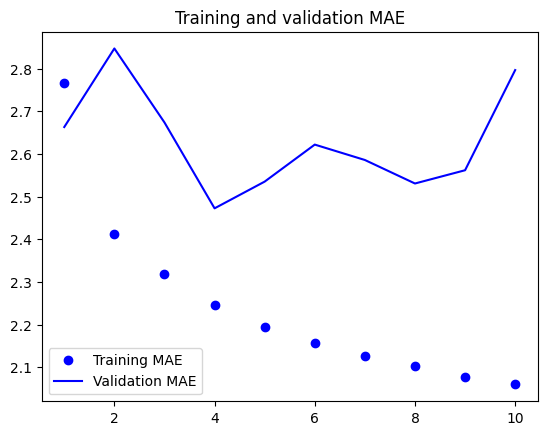

In [14]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

# Let's try a 1D convolutional model

In [15]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


2023-06-05 13:48:09.579018: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


819/819 [==============================] - 11s 8ms/step - loss: 23.6802 - mae: 3.8114 - val_loss: 17.7389 - val_mae: 3.2963
Epoch 2/10
819/819 [==============================] - 7s 8ms/step - loss: 15.4497 - mae: 3.1161 - val_loss: 15.1464 - val_mae: 3.0843
Epoch 3/10
819/819 [==============================] - 7s 8ms/step - loss: 13.7210 - mae: 2.9294 - val_loss: 15.0110 - val_mae: 3.0670
Epoch 4/10
819/819 [==============================] - 7s 8ms/step - loss: 12.8177 - mae: 2.8255 - val_loss: 14.0506 - val_mae: 2.9697
Epoch 5/10
819/819 [==============================] - 7s 8ms/step - loss: 12.1287 - mae: 2.7451 - val_loss: 14.4452 - val_mae: 2.9666
Epoch 6/10
819/819 [==============================] - 7s 8ms/step - loss: 11.6283 - mae: 2.6853 - val_loss: 14.8320 - val_mae: 3.0282
Epoch 7/10
819/819 [==============================] - 7s 8ms/step - loss: 11.2073 - mae: 2.6386 - val_loss: 14.5234 - val_mae: 2.9786
Epoch 8/10
819/819 [==============================] - 7s 8ms/step - loss

# A simple LSTM-based model

In [16]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10


2023-06-05 13:49:20.417537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 13:49:20.418597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 13:49:20.419315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

814/819 [============================>.] - ETA: 0s - loss: 46.4828 - mae: 4.9861

2023-06-05 13:49:27.072284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 13:49:27.073377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 13:49:27.074262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

819/819 [==============================] - 9s 9ms/step - loss: 46.3100 - mae: 4.9750 - val_loss: 13.4863 - val_mae: 2.7785
Epoch 2/10
819/819 [==============================] - 7s 8ms/step - loss: 11.3534 - mae: 2.6068 - val_loss: 9.8397 - val_mae: 2.4286
Epoch 3/10
819/819 [==============================] - 7s 9ms/step - loss: 9.7102 - mae: 2.4348 - val_loss: 9.7699 - val_mae: 2.4127
Epoch 4/10
819/819 [==============================] - 7s 9ms/step - loss: 9.0363 - mae: 2.3533 - val_loss: 10.0338 - val_mae: 2.4446
Epoch 5/10
819/819 [==============================] - 7s 9ms/step - loss: 8.7061 - mae: 2.3111 - val_loss: 10.2098 - val_mae: 2.4695
Epoch 6/10
819/819 [==============================] - 7s 9ms/step - loss: 8.4899 - mae: 2.2788 - val_loss: 10.5242 - val_mae: 2.5043
Epoch 7/10
819/819 [==============================] - 7s 9ms/step - loss: 8.3358 - mae: 2.2559 - val_loss: 10.3259 - val_mae: 2.4919
Epoch 8/10
819/819 [==============================] - 7s 9ms/step - loss: 8.1942

2023-06-05 13:50:34.138353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 13:50:34.139465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 13:50:34.140346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

405/405 [==============================] - 2s 5ms/step - loss: 10.8190 - mae: 2.5957
Test MAE: 2.60


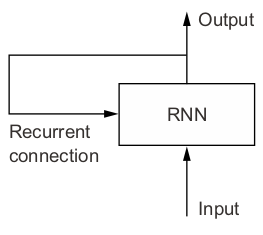

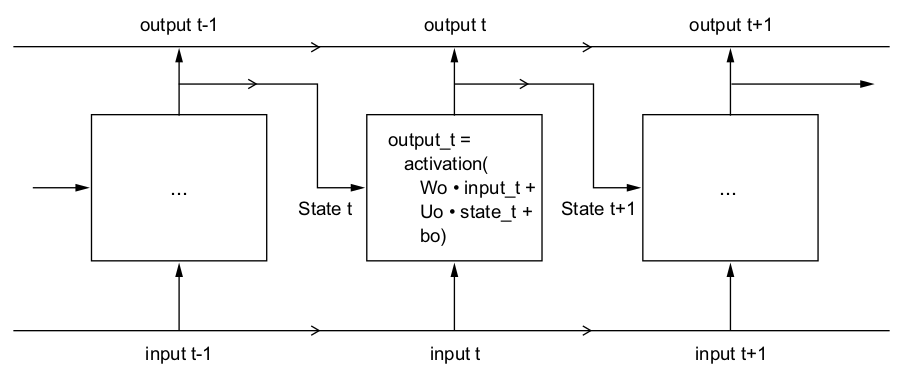

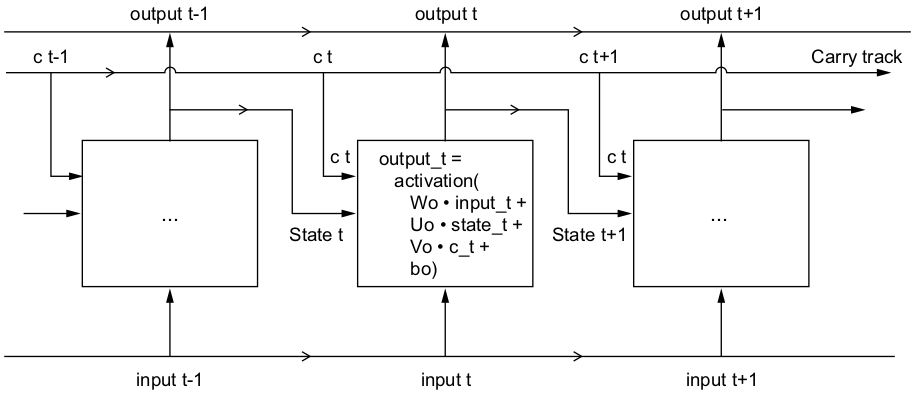

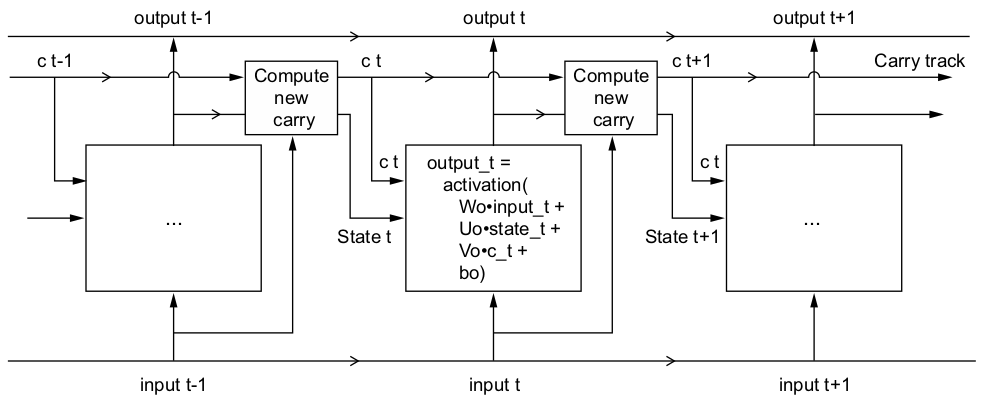

# Training and evaluating a dropout-regularized LSTM

In [17]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 133s 161ms/step - loss: 28.7395 - mae: 3.9369 - val_loss: 9.7572 - val_mae: 2.4177
Epoch 2/50
819/819 [==============================] - 132s 161ms/step - loss: 14.7752 - mae: 2.9882 - val_loss: 9.9140 - val_mae: 2.4409
Epoch 3/50
819/819 [==============================] - 131s 160ms/step - loss: 13.9210 - mae: 2.8962 - val_loss: 9.4476 - val_mae: 2.3800
Epoch 4/50
819/819 [==============================] - 133s 163ms/step - loss: 13.2667 - mae: 2.8258 - val_loss: 9.9261 - val_mae: 2.4510
Epoch 5/50
819/819 [==============================] - 134s 164ms/step - loss: 12.8126 - mae: 2.7777 - val_loss: 9.5810 - val_mae: 2.4004
Epoch 6/50
819/819 [==============================] - 135s 164ms/step - loss: 12.4323 - mae: 2.7322 - val_loss: 9.6313 - val_mae: 2.4090
Epoch 7/50
819/819 [==============================] - 134s 164ms/step - loss: 12.1299 - mae: 2.7001 - val_loss: 9.8968 - val_mae: 2.4378
Epoch 8/50
819/819 [=====================

# Training and evaluating a dropout-regularized, stacked GRU model

In [18]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/50
819/819 [==============================] - 255s 308ms/step - loss: 26.0219 - mae: 3.7551 - val_loss: 9.5616 - val_mae: 2.3860
Epoch 2/50
819/819 [==============================] - 253s 309ms/step - loss: 14.0659 - mae: 2.9100 - val_loss: 8.8823 - val_mae: 2.3088
Epoch 3/50
819/819 [==============================] - 252s 308ms/step - loss: 13.1777 - mae: 2.8136 - val_loss: 9.2058 - val_mae: 2.3497
Epoch 4/50
819/819 [==============================] - 253s 309ms/step - loss: 12.6116 - mae: 2.7538 - val_loss: 9.6692 - val_mae: 2.4122
Epoch 5/50
819/819 [==============================] - 261s 319ms/step - loss: 12.1974 - mae: 2.7123 - val_loss: 9.3239 - val_mae: 2.3749
Epoch 6/50
819/819 [==============================] - 261s 318ms/step - loss: 11.6822 - mae: 2.6525 - val_loss: 9.2519 - val_mae: 2.3560
Epoch 7/50
819/819 [==============================] - 262s 320ms/step - loss: 11.4195 - mae: 2.6234 - val_loss: 8.7214 - val_mae: 2.2985
Epoch 8/50
819/819 [=====================

# Training and evaluating a bidirectional LSTM

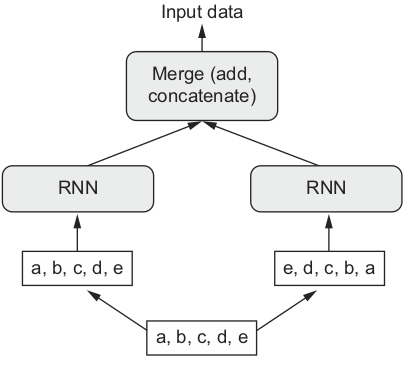

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_bidirectional.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_bidirectional.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

